# Logistic Regression Assumptions
### Box-Tidwell Test
- Using R to perform Box-Tidwell Test (or Assumption 2: Linearity of independent variables and log odds)
- Details on how to setup R kernel in Jupyter notebook: https://dzone.com/articles/using-r-on-jupyternbspnotebook
- We are using R here because Python does not have any native packages that executes Box Tidwell transformation directly
___

- One of the important assumptions of logistic regression is the linearity of the logit over the covariates. When this assumption is not met, a Box-Tidwell transformation might be helpful. 
- The Box-Tidwell Test is used to check this assumption by testing whether the logit transform is a linear function of the predictor, effectively by adding the non-linear transform of the original predictor as an interaction term to test if this addition made no better prediction.
- A significant p-value in the Box-Tidwell transformation means that the linearity assumption is **violated**
- If one variable is indeed found to be non-linear, then we may need to incorporate higher order polynomial terms for that variable in the regression analysis to capture the non-linearity

#### References
- https://stats.stackexchange.com/questions/503906/solution-in-case-of-violation-of-the-linearity-assumption-in-the-logistic-regres
- https://www.youtube.com/watch?v=sciPFNcYqi8&ab_channel=MikeCrowson

In [1]:
# Installing car package to make use of the box tidwell function within
install.packages("car")
install.packages("tidyverse")

Installing package into 'C:/Users/kenne/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'car' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kenne\AppData\Local\Temp\RtmpCsqbJe\downloaded_packages


Installing package into 'C:/Users/kenne/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kenne\AppData\Local\Temp\RtmpCsqbJe\downloaded_packages


In [2]:
library(car)
library(ggplot2)

Loading required package: carData



In [43]:
# Import processed dataset (generated from Logistic_Regression_Assumptions.ipynb)
df_main <- read.csv(file = 'data/train_processed.csv')
head(df_main)

,Survived,Age,TravelAlone,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,22,0,0,1,0,1,1
2,1,38,0,0,0,0,0,0
3,1,26,1,0,1,0,1,0
4,1,35,0,0,0,0,1,0
5,0,35,1,0,1,0,1,1
6,0,28,1,0,1,1,0,1


### 1. Box-Tidwell Test with `car` library's `boxTidwell`
- We can run Box-Tidwell test directly using the boxTidwell function within the `car` package

In [72]:
# Running Box-Tidwell test with `boxTidwell`
boxTidwell(formula = Survived ~ Age, 
           other.x = ~ TravelAlone + Pclass_2 + Pclass_3 + Embarked_Q + Embarked_S + Sex_male, 
           data=df_main)

 MLE of lambda Score Statistic (z) Pr(>|z|)  
      -0.33063              2.5659  0.01029 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

iterations =  6 

- p-value = 0.01029, which is <0.05 (meaning that it is statistically significant)
- This means that there is non-linearity in the Age feature, and the assumption has been violated
- We can resolve this by including a polynomial term (e.g. Age^2) to account for the non-linearity

___
### 2. Box-Tidwell Test (add interaction terms directly)

In [69]:
lreg <- glm(Survived ~ Age + (Age:log(Age)) + TravelAlone + Pclass_2 + Pclass_3 + Embarked_Q + Embarked_S + Sex_male, 
            data=df_main, 
            family=binomial(link="logit"))
logodds <- lreg$linear.predictors
summary(lreg)


Call:
glm(formula = Survived ~ Age + (Age:log(Age)) + TravelAlone + 
    Pclass_2 + Pclass_3 + Embarked_Q + Embarked_S + Sex_male, 
    family = binomial(link = "logit"), data = df_main)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7559  -0.6605  -0.3839   0.6131   2.4597  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   4.68042    0.54912   8.523  < 2e-16 ***
Age          -0.19225    0.06985  -2.752 0.005917 ** 
TravelAlone   0.17958    0.19828   0.906 0.365105    
Pclass_2     -0.93782    0.26639  -3.520 0.000431 ***
Pclass_3     -2.26091    0.25532  -8.855  < 2e-16 ***
Embarked_Q   -0.01964    0.37279  -0.053 0.957992    
Embarked_S   -0.57206    0.23533  -2.431 0.015061 *  
Sex_male     -2.64082    0.19921 -13.256  < 2e-16 ***
Age:log(Age)  0.03672    0.01598   2.298 0.021540 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance

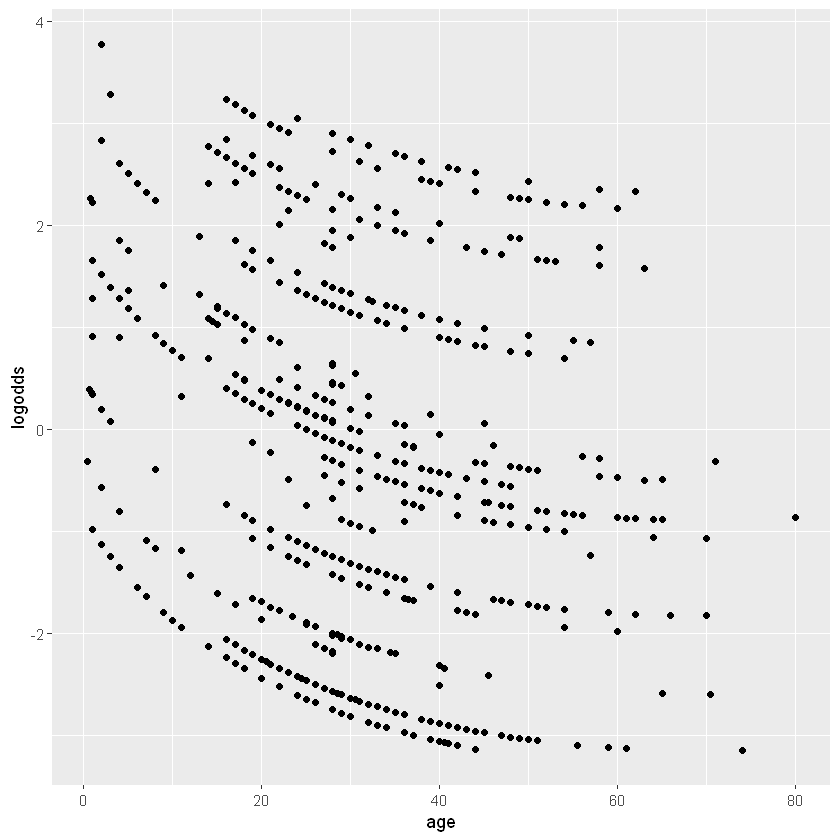

In [70]:
# Plot the log odds against the x (independent) predictor variable
plot.dat <- data.frame(logodds = logodds, age = df_main$Age)
ggplot(plot.dat, aes(x=age, y=logodds)) + geom_point()

___

In [ ]:
# # Reference: https://stackoverflow.com/questions/27278745/can-the-boxtidwell-function-handle-binary-outcome-variables
# x<-df_main$Age
# y<-df_main$Survived

# #FIT IS DONE USING THE glm FUNCTION
# m1res <- glm(y ~ x,family=binomial(link = "logit"))
# coeff1<- coefficients(summary(m1res))
# lnx<-x*log(x)
# m2res <- glm(y ~ x+lnx ,family=binomial(link = "logit"))
# coeff2<- coefficients(summary(m2res))
# alpha0<-1.0
# pvalue<-coeff2[3,4]

# pvalue
# beta1<-coeff1[2,1]
# beta2<-coeff2[3,1]
# iter<-0
# err<-1

# while (pvalue<0.1) {
#     alpha <-(beta2/beta1)+alpha0 
#     err<-abs(alpha-alpha0)
#     alpha0<-alpha
#     mx<-x^alpha
#     m1res <- glm(y ~ mx,family=binomial(link = "logit"))
#     coeff1<- coefficients(summary(m1res))
#     mlnx<-mx*log(x)
#     m2res <- glm(y ~ mx+mlnx ,family=binomial(link = "logit"))
#     coeff2<- coefficients(summary(m2res))
#     pvalue<-coeff2[3,4]
#     beta1<-coeff1[2,1]
#     beta2<-coeff2[3,1]
#     iter<- iter+1
#     }

# # PRINT THE POWER TO CONSOLE
# alpha

In [41]:
# Standard example for Box-Tidwell (on Prestige dataset)
# Prestige

,education,income,women,prestige,census,type
,<dbl>,<int>,<dbl>,<dbl>,<int>,<fct>
gov.administrators,13.11,12351,11.16,68.8,1113,prof
general.managers,12.26,25879,4.02,69.1,1130,prof
accountants,12.77,9271,15.70,63.4,1171,prof
purchasing.officers,11.42,8865,9.11,56.8,1175,prof
chemists,14.62,8403,11.68,73.5,2111,prof
physicists,15.64,11030,5.13,77.6,2113,prof
biologists,15.09,8258,25.65,72.6,2133,prof
architects,15.44,14163,2.69,78.1,2141,prof
civil.engineers,14.52,11377,1.03,73.1,2143,prof


In [46]:
# boxTidwell(prestige ~ income + education, ~ type + poly(women, 2), data=Prestige)

          MLE of lambda Score Statistic (z)  Pr(>|z|)    
income         -0.34763             -4.4824 7.381e-06 ***
education       1.25383              0.2170    0.8282    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

iterations =  8 